# LESSON 7: Support Vector Machines

1. Use any dataset from https://archive.ics.uci.edu/datasets?Task=Clustering&skip=0&take=10&sort=desc&orderBy=NumHits&search=&Area=Biology2. 
Each student should have a unique dataset otherwise no points will be given, so you need to discuss with your classmate

KEGG Metabolic Relation Network (Directed)<br>
Dataset: https://archive.ics.uci.edu/dataset/220/kegg+metabolic+relation+network+directed.

In [30]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd

ionosphere = fetch_ucirepo(id=52)

df = pd.DataFrame(ionosphere.data.original, columns=ionosphere.data.headers)
df

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

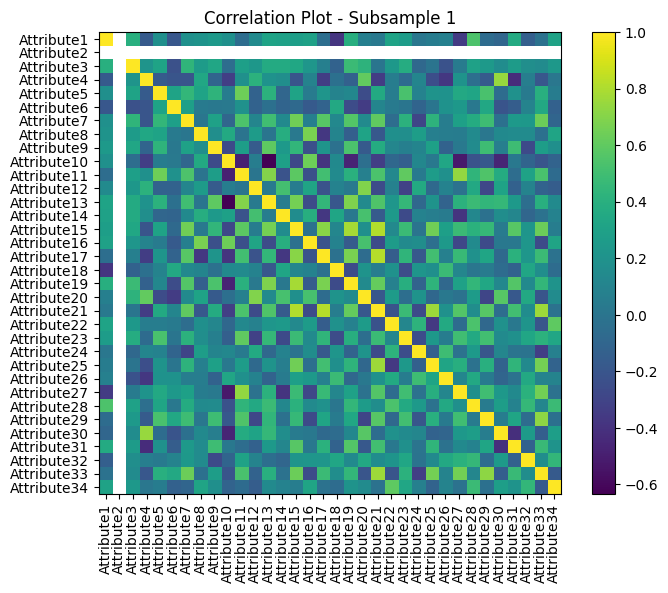

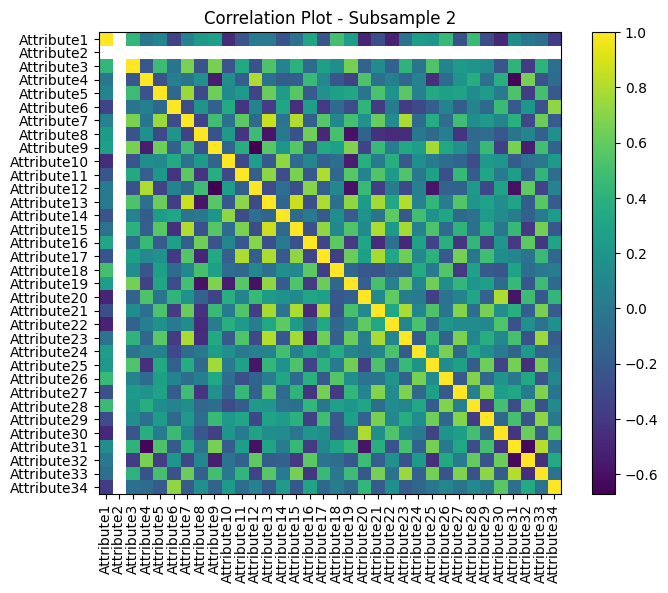

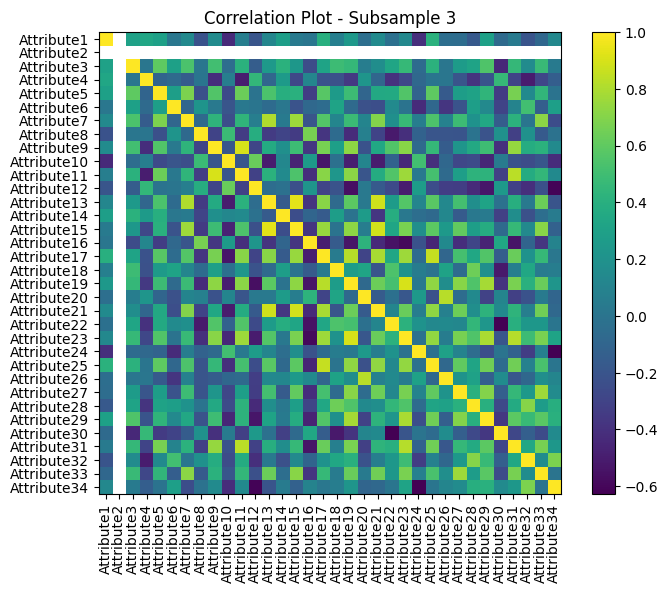

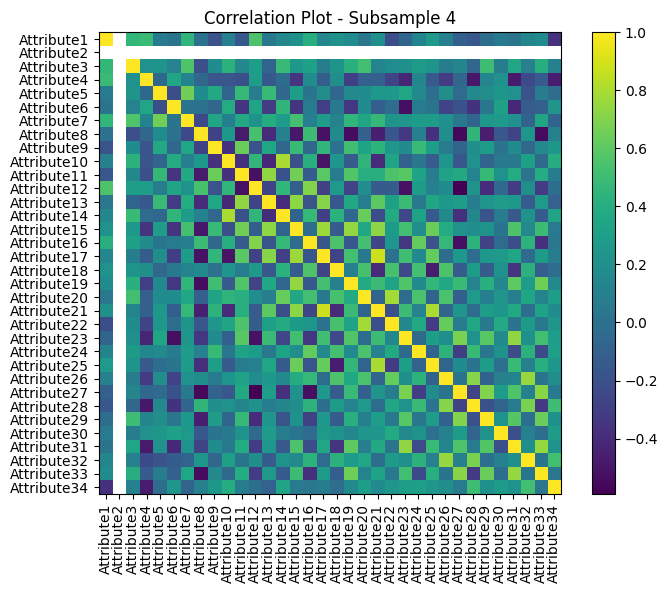

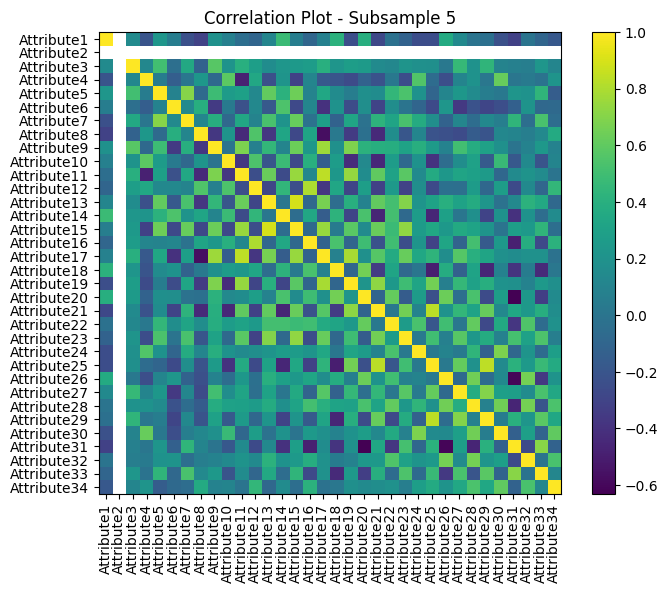

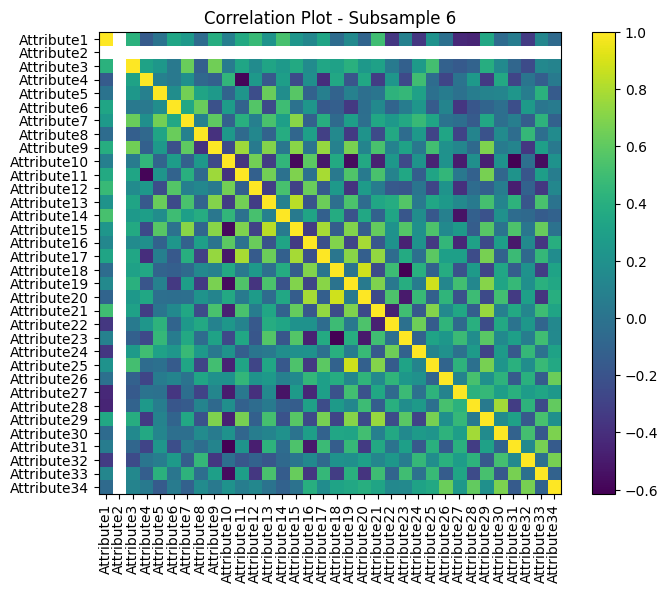

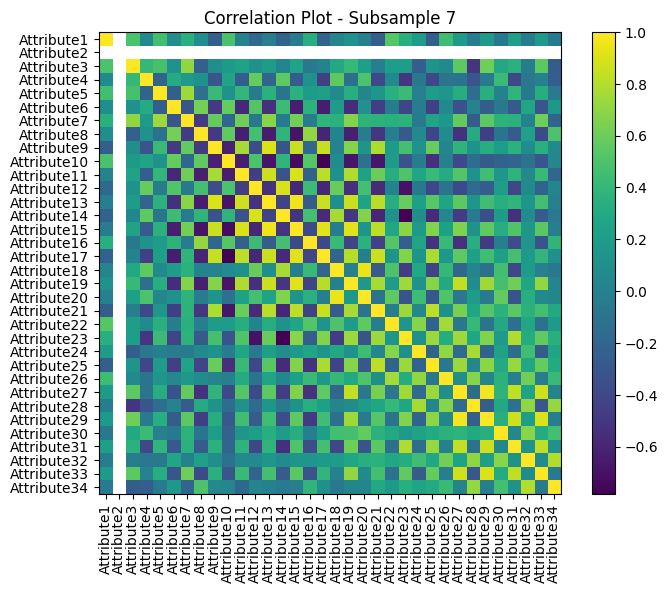

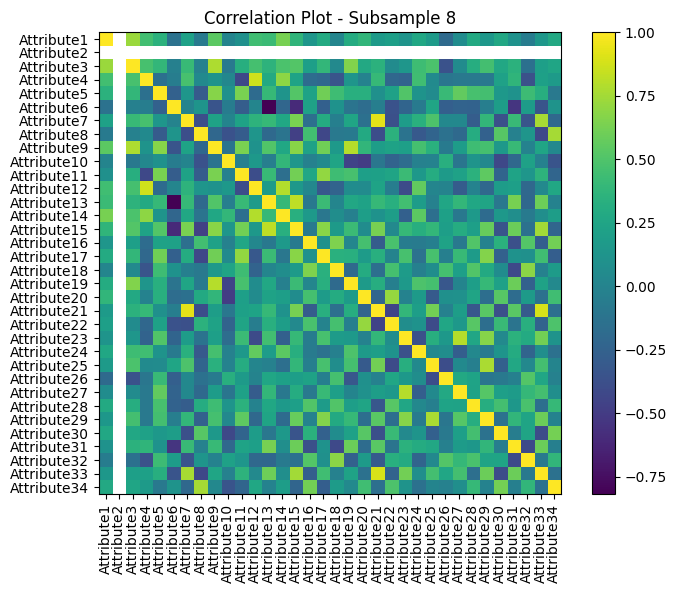

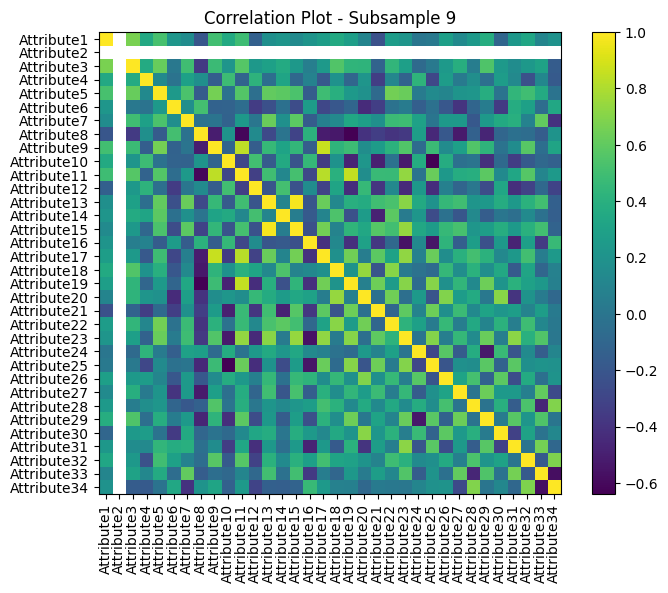

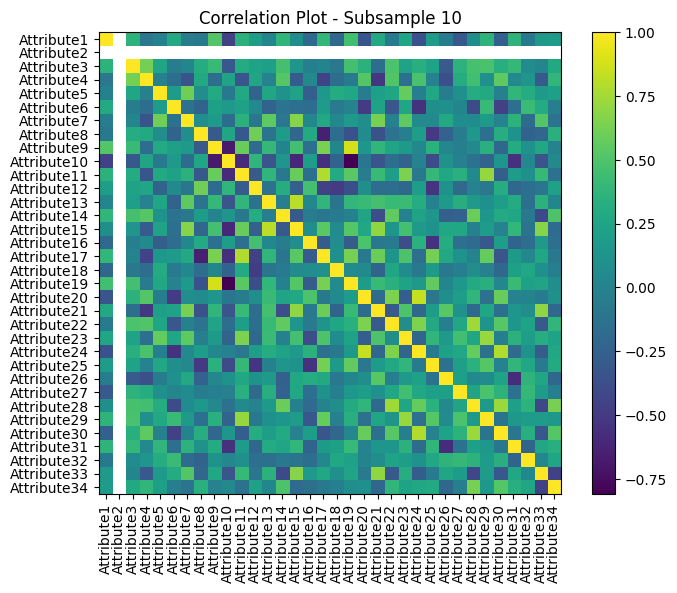

In [31]:
import matplotlib.pyplot as plt

df_exclusion = df.drop(columns=['Class'])
# Define the number of subsamples
num_subsamples = 10
sample_size = len(df_exclusion) // num_subsamples

# Create correlation plots for each subsample
for i in range(num_subsamples):
    # Take a subsample
    subsample = df_exclusion.sample(n=sample_size)
    
    # Calculate correlation matrix
    corr = subsample.corr()
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(corr, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Correlation Plot - Subsample {i+1}")
    plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(np.arange(len(corr.columns)), corr.columns)
    plt.show()

**TASK (Classification): If your problem is a classification problem visually check if the target variable is imbalanced**

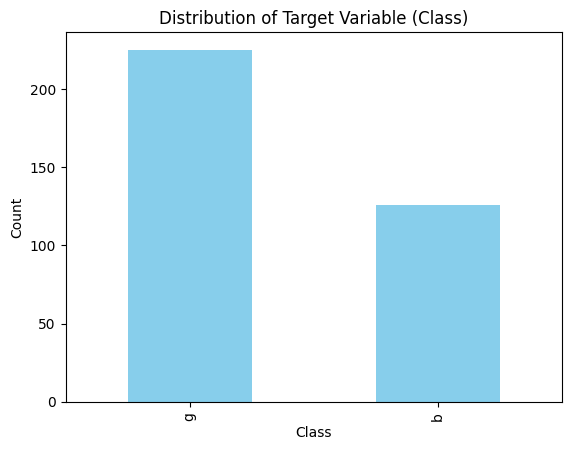

Imbalance Ratio: 0.56


In [32]:
# Check if the problem is a classification problem
if len(df['Class'].unique()) <= 2:  
    # Plot the distribution of target variable to check for imbalance
    df['Class'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Distribution of Target Variable (Class)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate the imbalance ratio
    class_counts = df['Class'].value_counts()
    imbalance_ratio = class_counts.iloc[1] / class_counts.iloc[0]
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
else:
    print("Not a binary classification problem.")


**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

In [33]:
# import seaborn as sns

# # Replace infinite values with NaN and drop rows with NaN values
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.dropna(inplace=True)

# # Define the number of subsamples
# num_subsamples = 10
# sample_size = len(df) // num_subsamples

# # Create pair plots for each subsample
# for i in range(num_subsamples):
#     # Take a subsample
#     subsample = df.sample(n=sample_size)
    
#     # Create pair plot
#     plt.figure(figsize=(12, 10))
#     sns.pairplot(subsample, hue='Class', diag_kind='kde', palette='Set2')
#     plt.suptitle(f"Pair Plot - Subsample {i+1}", y=1.02)
#     plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

ValueError: The condensed distance matrix must contain only finite values.

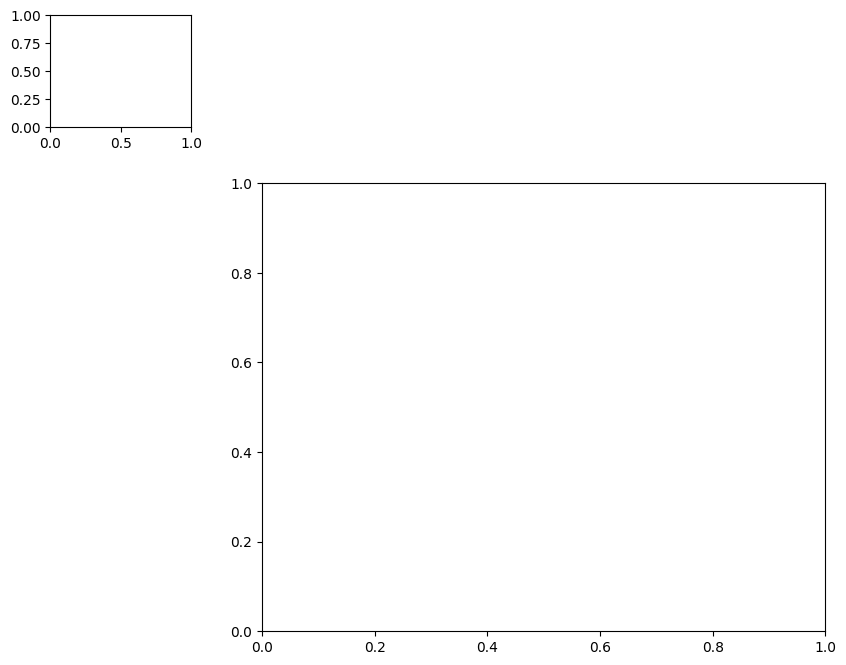

In [37]:
import seaborn as sns

# Drop the 'Class' column
df_features = df.drop(columns=['Class'])

# Drop columns with infinite values
df_features = df_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

# Create a clustermap to explore relationships between variables
sns.clustermap(df_features.corr(), cmap='viridis', annot=True, figsize=(10, 8))
plt.title('Clustermap - Correlation between variables')
plt.show()


**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Class' is the target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modeling
svm_model = SVC(kernel='rbf', random_state=42)  # Using rbf kernel
svm_model.fit(X_train, y_train)

# Evaluate the model
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Model Performance:")
print("Accuracy:", svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, svm_pred))

# Improving performance using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model with best parameters
best_svm_model = grid_search.best_estimator_
best_svm_pred = best_svm_model.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_pred)

print("\nImproved SVM Model Performance:")
print("Accuracy:", best_svm_accuracy)
print("Classification Report:")
print(classification_report(y_test, best_svm_pred))


SVM Model Performance:
Accuracy: 0.9295774647887324
Classification Report:
              precision    recall  f1-score   support

           b       1.00      0.82      0.90        28
           g       0.90      1.00      0.95        43

    accuracy                           0.93        71
   macro avg       0.95      0.91      0.92        71
weighted avg       0.94      0.93      0.93        71

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, ker